##### Convolutional neural network (CNN)
• Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

# Imports

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Loading the Dataset

In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to range [0,1]

In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Grayscale - single channel reshaping

In [13]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [14]:
X_train.shape

(60000, 28, 28, 1)

# Converting y into 10 classes

In [15]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model Architecture

In [16]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 226s 133ms/step - accuracy: 0.8028 - loss: 0.5463 - val_accuracy: 0.8947 - val_loss: 0.2904


In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8917 - loss: 0.3093


0.8916000127792358

# Confusion Matrix

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


In [22]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Prediction

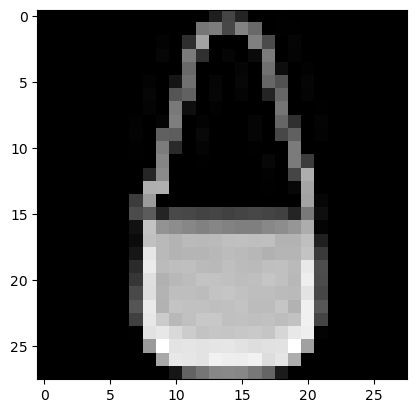

In [23]:
image = X_test[-3].squeeze()
true_label = np.argmax(y_test[-3])
plt.imshow(image, cmap='gray');

In [24]:
pred = model.predict(X_test[-3].reshape(1, 28, 28, 1))
index = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [25]:
fashion_categories = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [26]:
fashion_categories[index[0]]

'Bag'